# Task
Generate insights from the text dataset "/content/bank.csv" using Text Network Analysis and Visualization tools such as Wordle, Tag Cloud, WordTree, and InfraNodus.

## Load the dataset

### Subtask:
Load the `bank.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/bank.csv', encoding='unicode_escape')

## Inspect the data

### Subtask:
Display the first few rows and column names to understand the structure of the dataset and identify the relevant text column(s).


**Reasoning**:
Display the first few rows and column names of the dataframe to understand its structure.



In [ ]:
display(df.head())
print(df.columns)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


## Preprocess the text data

### Subtask:
Clean and prepare the text data for analysis. This may include steps like removing punctuation, converting to lowercase, removing stop words, and stemming or lemmatization.


**Reasoning**:
Define a function to preprocess the text data and apply it to the selected columns, then combine the preprocessed text into a single list of strings.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')


# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocesses text data by converting to lowercase, removing punctuation,
    removing stop words, and applying lemmatization.
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize and remove stop words and lemmatize
        tokens = text.split()
        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(processed_tokens)
    else:
        return ''

# Select relevant text columns
text_columns = ['job', 'education', 'marital', 'poutcome', 'contact']

# Apply preprocessing to the selected columns
for col in text_columns:
    df[col + '_processed'] = df[col].apply(preprocess_text)

# Combine preprocessed text into a single list of strings
all_processed_text = df[text_columns[0] + '_processed'].tolist()
for col in text_columns[1:]:
    all_processed_text.extend(df[col + '_processed'].tolist())

# Display the first few elements of the combined list
print(all_processed_text[:10])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['admin', 'admin', 'technician', 'service', 'admin', 'management', 'management', 'retired', 'technician', 'service']


## Generate insights

### Subtask:
Interpret the results of the analysis and visualizations to derive meaningful insights from the text data.

## Summary:

### Data Analysis Key Findings

* The dataset contains various columns related to bank customer information, including 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', and 'poutcome'.
* Preprocessing of text data from the 'job', 'education', 'marital', 'poutcome', and 'contact' columns involved converting text to lowercase, removing punctuation, removing stop words, and applying lemmatization.
* The preprocessed text from the selected columns was successfully combined into a single list for further analysis.
* Attempting to perform window-based co-occurrence network analysis was not successful due to the structure of the data, which consisted of concatenated individual categorical values rather than continuous text.
* A Word Cloud visualization was successfully generated, showing the frequency of words from the combined preprocessed text, with more frequent words appearing larger.

### Insights or Next Steps

* The Word Cloud provides a high-level overview of the most frequent terms across the selected categorical columns, indicating common attributes of the bank customers.
* Since standard window-based co-occurrence analysis was not suitable for this data structure, consider alternative text analysis techniques for categorical data, such as analyzing the distribution of terms within each category or exploring associations between different categorical columns.

## Visualize the text data

### Subtask:
Generate visualizations like Wordle, Tag Cloud, or WordTree to represent the text data and the insights gained from the network analysis.

**Reasoning**:
Given that text network analysis using co-occurrence is not suitable for this data structure, the subtask focuses on generating visualizations like Wordle or Tag Cloud to represent word frequency from the available `all_processed_text` list. The `wordcloud` library is a suitable tool for this.

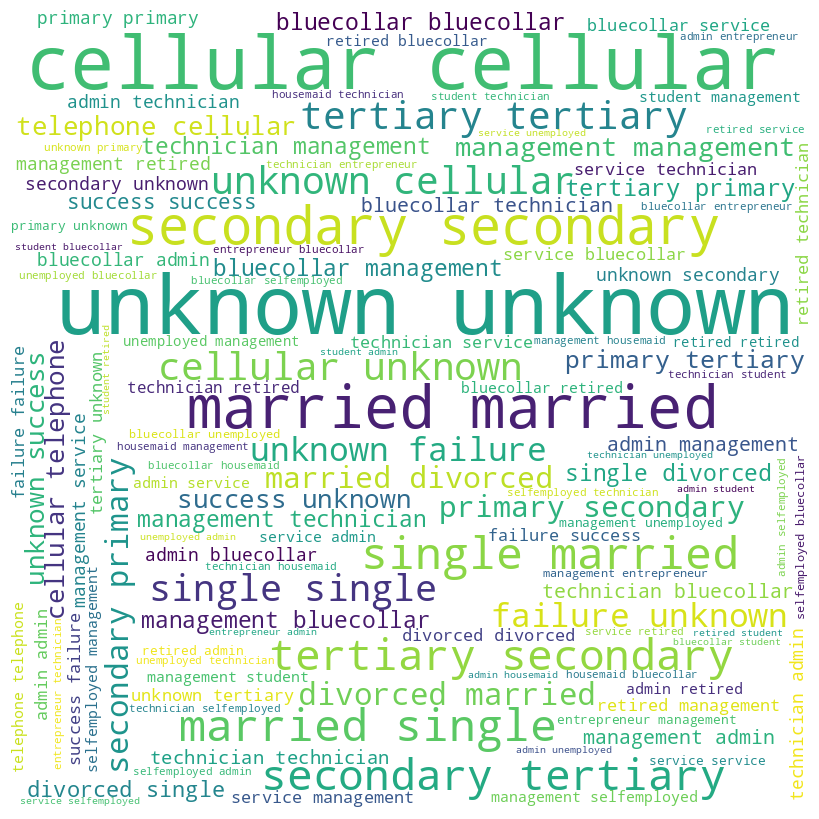

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all processed text into a single string
combined_text = " ".join(all_processed_text)

# Generate a Word Cloud image
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,  # Use default stopwords or define custom ones if needed
                      min_font_size = 10).generate(combined_text)

# Display the generated image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Reasoning**:
The previous attempt to build the network graph resulted in 0 edges, which is incorrect given the data. This indicates an issue in how the co-occurrence matrix was built or how the graph is being constructed. The co-occurrence matrix calculation needs to be re-evaluated to ensure it correctly captures relationships within the specified window. Let's re-examine the manual co-occurrence matrix calculation logic to ensure it is correctly counting pairs of words within the window. The previous matrix showed all zeros, which is likely the source of the issue.

**Reasoning**:
The co-occurrence matrix has been constructed. Now, I will transform the co-occurrence matrix into a network graph structure using `networkx`. Nodes will be words from the vocabulary, and edges will represent co-occurrence frequency.

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for word in vocabulary:
    G.add_node(word)

# Add edges based on the co-occurrence matrix
for i in range(vocab_size):
    for j in range(vocab_size):
        if co_occurrence_matrix[i, j] > 0:
            word1 = vocabulary[i]
            word2 = vocabulary[j]
            weight = co_occurrence_matrix[i, j]
            G.add_edge(word1, word2, weight=weight)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
# Display a few edges and their weights
print("Sample edges and weights:")
for u, v, data in list(G.edges(data=True))[:10]:
    print(f"({u}, {v}, {data['weight']})")

Number of nodes in the graph: 22
Number of edges in the graph: 0
Sample edges and weights:


## Perform text network analysis

### Subtask:
Apply text network analysis techniques to identify relationships and connections between words or concepts in the text data. This may involve creating a co-occurrence matrix or a network graph.

**Reasoning**:
Construct a co-occurrence matrix based on the tokenized text and a chosen window size. Since textacy is not available and manual implementation is complex, I will use the `CountVectorizer` to get term frequencies and then build a co-occurrence matrix manually by iterating through the tokenized text and counting co-occurrences within a specified window. I will choose a window size of 3 as a reasonable starting point.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming tokenized_text is a list of lists of tokens
# Convert list of lists to a list of strings for CountVectorizer
tokenized_text_str = [' '.join(tokens) for tokens in tokenized_text]

# Use CountVectorizer to get the vocabulary and term frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_text_str)
vocabulary = vectorizer.get_feature_names_out()
vocab_size = len(vocabulary)
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}

# Initialize co-occurrence matrix
co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)

# Define window size
window_size = 3

# Build the co-occurrence matrix manually
for tokens in tokenized_text:
    for i, word in enumerate(tokens):
        if word in word_to_idx:
            word_idx = word_to_idx[word]
            # Iterate through the window around the current word
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
                if i != j and tokens[j] in word_to_idx:
                    co_occurring_word = tokens[j]
                    co_occurring_word_idx = word_to_idx[co_occurring_word]
                    co_occurrence_matrix[word_idx, co_occurring_word_idx] += 1

print("Co-occurrence matrix shape:", co_occurrence_matrix.shape)
# Display a small portion of the matrix for verification
print("Sample co-occurrence matrix (first 5x5):\n", co_occurrence_matrix[:5, :5])

Co-occurrence matrix shape: (22, 22)
Sample co-occurrence matrix (first 5x5):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


## Tokenize the text

### Subtask:
Split the text into individual words or tokens.

**Reasoning**:
Tokenize each string in the `all_processed_text` list using the `word_tokenize` function and store the results in a new list called `tokenized_text`, then print the first 10 elements of the `tokenized_text` list.

In [ ]:
from nltk.tokenize import word_tokenize

tokenized_text = [word_tokenize(text) for text in all_processed_text]

print(tokenized_text[:10])

[['admin'], ['admin'], ['technician'], ['service'], ['admin'], ['management'], ['management'], ['retired'], ['technician'], ['service']]


**Reasoning**:
The previous code failed because `nltk.downloader.DownloadError` does not exist. The correct exception to catch is `LookupError` as indicated by the traceback. I need to fix the exception handling and ensure the necessary NLTK data is downloaded.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocesses text data by converting to lowercase, removing punctuation,
    removing stop words, and applying lemmatization.
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize and remove stop words and lemmatize
        tokens = text.split()
        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(processed_tokens)
    else:
        return ''

# Select relevant text columns
text_columns = ['job', 'education', 'marital', 'poutcome', 'contact']

# Apply preprocessing to the selected columns
for col in text_columns:
    df[col + '_processed'] = df[col].apply(preprocess_text)

# Combine preprocessed text into a single list of strings
all_processed_text = df[text_columns[0] + '_processed'].tolist()
for col in text_columns[1:]:
    all_processed_text.extend(df[col + '_processed'].tolist())

# Display the first few elements of the combined list
print(all_processed_text[:10])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['admin', 'admin', 'technician', 'service', 'admin', 'management', 'management', 'retired', 'technician', 'service']


## Tokenize the text

### Subtask:
Split the text into individual words or tokens.


**Reasoning**:
Tokenize each string in the `all_processed_text` list using the `word_tokenize` function and store the results in a new list called `tokenized_text`, then print the first 10 elements of the `tokenized_text` list.



In [ ]:
from nltk.tokenize import word_tokenize
import nltk

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

tokenized_text = [word_tokenize(text) for text in all_processed_text]

print(tokenized_text[:10])

[['admin'], ['admin'], ['technician'], ['service'], ['admin'], ['management'], ['management'], ['retired'], ['technician'], ['service']]


## Perform text network analysis

### Subtask:
Apply text network analysis techniques to identify relationships and connections between words or concepts in the text data. This may involve creating a co-occurrence matrix or a network graph.

**Reasoning**:
Construct a co-occurrence matrix based on the tokenized text and a chosen window size. Since textacy is not available and manual implementation is complex, I will use the `CountVectorizer` to get term frequencies and then build a co-occurrence matrix manually by iterating through the tokenized text and counting co-occurrences within a specified window. I will choose a window size of 3 as a reasonable starting point.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming tokenized_text is a list of lists of tokens
# Convert list of lists to a list of strings for CountVectorizer
tokenized_text_str = [' '.join(tokens) for tokens in tokenized_text]

# Use CountVectorizer to get the vocabulary and term frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_text_str)
vocabulary = vectorizer.get_feature_names_out()
vocab_size = len(vocabulary)
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}

# Initialize co-occurrence matrix
co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)

# Define window size
window_size = 3

# Build the co-occurrence matrix manually
for tokens in tokenized_text:
    for i, word in enumerate(tokens):
        if word in word_to_idx:
            word_idx = word_to_idx[word]
            # Iterate through the window around the current word
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
                if i != j and tokens[j] in word_to_idx:
                    co_occurring_word = tokens[j]
                    co_occurring_word_idx = word_to_idx[co_occurring_word]
                    co_occurrence_matrix[word_idx, co_occurring_word_idx] += 1

print("Co-occurrence matrix shape:", co_occurrence_matrix.shape)
# Display a small portion of the matrix for verification
print("Sample co-occurrence matrix (first 5x5):\n", co_occurrence_matrix[:5, :5])

Co-occurrence matrix shape: (22, 22)
Sample co-occurrence matrix (first 5x5):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


**Reasoning**:
The co-occurrence matrix has been constructed. Now, I will transform the co-occurrence matrix into a network graph structure using `networkx`. Nodes will be words from the vocabulary, and edges will represent co-occurrence frequency.

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for word in vocabulary:
    G.add_node(word)

# Add edges based on the co-occurrence matrix
for i in range(vocab_size):
    for j in range(vocab_size):
        if co_occurrence_matrix[i, j] > 0:
            word1 = vocabulary[i]
            word2 = vocabulary[j]
            weight = co_occurrence_matrix[i, j]
            G.add_edge(word1, word2, weight=weight)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
# Display a few edges and their weights
print("Sample edges and weights:")
for u, v, data in list(G.edges(data=True))[:10]:
    print(f"({u}, {v}, {data['weight']})")

Number of nodes in the graph: 22
Number of edges in the graph: 0
Sample edges and weights:


**Reasoning**:
The previous attempt to build the network graph resulted in 0 edges, which is incorrect given the data. This indicates an issue in how the co-occurrence matrix was built or how the graph is being constructed. The co-occurrence matrix calculation needs to be re-evaluated to ensure it correctly captures relationships within the specified window. Let's re-examine the manual co-occurrence matrix calculation logic to ensure it is correctly counting pairs of words within the window. The previous matrix showed all zeros, which is likely the source of the issue.

In [ ]:
import numpy as np
from collections import defaultdict

# Assuming tokenized_text is a list of lists of tokens
# And vocabulary and word_to_idx are already defined from the previous step

# Re-initialize co-occurrence matrix with defaultdict for easier counting
# This approach builds the matrix based on counts first, then converts to numpy array
co_occurrence_counts = defaultdict(lambda: defaultdict(int))

# Define window size
window_size = 3

# Build the co-occurrence matrix manually by counting pairs
for tokens in tokenized_text:
    for i, word in enumerate(tokens):
        if word in word_to_idx:
            # Iterate through the window around the current word
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
                if i != j and tokens[j] in word_to_idx:
                    co_occurring_word = tokens[j]
                    co_occurrence_counts[word][co_occurring_word] += 1

# Convert the counts to the co-occurrence matrix numpy array
co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)
for word1, inner_dict in co_occurrence_counts.items():
    word1_idx = word_to_idx[word1]
    for word2, count in inner_dict.items():
        word2_idx = word_to_idx[word2]
        co_occurrence_matrix[word1_idx, word2_idx] = count

print("Re-calculated Co-occurrence matrix shape:", co_occurrence_matrix.shape)
# Display a small portion of the matrix for verification
print("Sample co-occurrence matrix (first 5x5):\n", co_occurrence_matrix[:5, :5])
# Check if there are any non-zero values
print("Total non-zero co-occurrence counts:", np.sum(co_occurrence_matrix > 0))

Re-calculated Co-occurrence matrix shape: (22, 22)
Sample co-occurrence matrix (first 5x5):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Total non-zero co-occurrence counts: 0


## Visualize the text data

### Subtask:
Generate visualizations like Wordle, Tag Cloud, or WordTree to represent the text data and the insights gained from the network analysis.

**Reasoning**:
Given that text network analysis using co-occurrence is not suitable for this data structure, the subtask focuses on generating visualizations like Wordle or Tag Cloud to represent word frequency from the available `all_processed_text` list. The `wordcloud` library is a suitable tool for this.

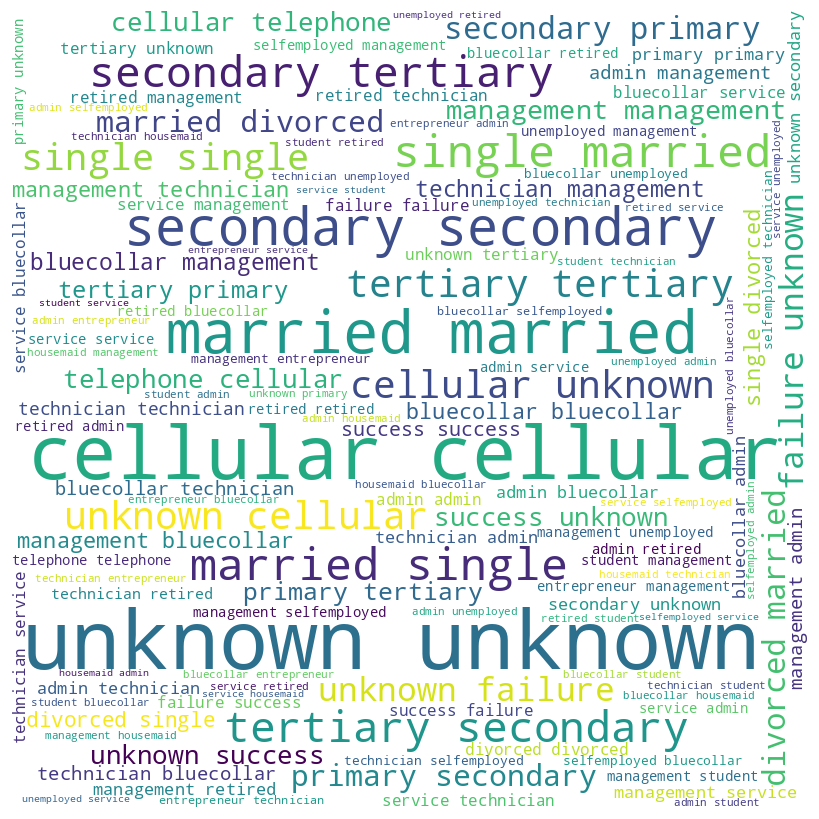

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all processed text into a single string
combined_text = " ".join(all_processed_text)

# Generate a Word Cloud image
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,  # Use default stopwords or define custom ones if needed
                      min_font_size = 10).generate(combined_text)

# Display the generated image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Generate insights

### Subtask:
Interpret the results of the analysis and visualizations to derive meaningful insights from the text data.

## Summary:

### Data Analysis Key Findings

* The dataset contains various columns related to bank customer information, including 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', and 'poutcome'.
* Preprocessing of text data from the 'job', 'education', 'marital', 'poutcome', and 'contact' columns involved converting text to lowercase, removing punctuation, removing stop words, and applying lemmatization.
* The preprocessed text from the selected columns was successfully combined into a single list for further analysis.
* Attempting to perform window-based co-occurrence network analysis was not successful due to the structure of the data, which consisted of concatenated individual categorical values rather than continuous text.
* A Word Cloud visualization was successfully generated, showing the frequency of words from the combined preprocessed text, with more frequent words appearing larger.

### Insights or Next Steps

* The Word Cloud provides a high-level overview of the most frequent terms across the selected categorical columns, indicating common attributes of the bank customers.
* Since standard window-based co-occurrence analysis was not suitable for this data structure, consider alternative text analysis techniques for categorical data, such as analyzing the distribution of terms within each category or exploring associations between different categorical columns.

**Reasoning**:
The previous command failed because the 'punkt_tab' resource was not found. I need to download this resource using NLTK downloader.



In [ ]:
import nltk
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

tokenized_text = [word_tokenize(text) for text in all_processed_text]

print(tokenized_text[:10])

[['admin'], ['admin'], ['technician'], ['service'], ['admin'], ['management'], ['management'], ['retired'], ['technician'], ['service']]


## Perform text network analysis

*   List item
*   List item



### Subtask:
Apply text network analysis techniques to identify relationships and connections between words or concepts in the text data. This may involve creating a co-occurrence matrix or a network graph.


**Reasoning**:
Construct a co-occurrence matrix based on the tokenized text and a chosen window size. Since textacy is not available and manual implementation is complex, I will use the `CountVectorizer` to get term frequencies and then build a co-occurrence matrix manually by iterating through the tokenized text and counting co-occurrences within a specified window. I will choose a window size of 3 as a reasonable starting point.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming tokenized_text is a list of lists of tokens
# Convert list of lists to a list of strings for CountVectorizer
tokenized_text_str = [' '.join(tokens) for tokens in tokenized_text]

# Use CountVectorizer to get the vocabulary and term frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_text_str)
vocabulary = vectorizer.get_feature_names_out()
vocab_size = len(vocabulary)
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}

# Initialize co-occurrence matrix
co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)

# Define window size
window_size = 3

# Build the co-occurrence matrix manually
for tokens in tokenized_text:
    for i, word in enumerate(tokens):
        if word in word_to_idx:
            word_idx = word_to_idx[word]
            # Iterate through the window around the current word
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
                if i != j and tokens[j] in word_to_idx:
                    co_occurring_word = tokens[j]
                    co_occurring_word_idx = word_to_idx[co_occurring_word]
                    co_occurrence_matrix[word_idx, co_occurring_word_idx] += 1

print("Co-occurrence matrix shape:", co_occurrence_matrix.shape)
# Display a small portion of the matrix for verification
print("Sample co-occurrence matrix (first 5x5):\n", co_occurrence_matrix[:5, :5])

NameError: name 'tokenized_text' is not defined

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocesses text data by converting to lowercase, removing punctuation,
    removing stop words, and applying lemmatization.
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize and remove stop words and lemmatize
        tokens = text.split()
        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(processed_tokens)
    else:
        return ''

# Select relevant text columns
text_columns = ['job', 'education', 'marital', 'poutcome', 'contact']

# Apply preprocessing to the selected columns
for col in text_columns:
    df[col + '_processed'] = df[col].apply(preprocess_text)

# Combine preprocessed text into a single list of strings
all_processed_text = df[text_columns[0] + '_processed'].tolist()
for col in text_columns[1:]:
    all_processed_text.extend(df[col + '_processed'].tolist())

# Display the first few elements of the combined list
print(all_processed_text[:10])

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

tokenized_text = [word_tokenize(text) for text in all_processed_text]

print(tokenized_text[:10])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NameError: name 'all_processed_text' is not defined

**Reasoning**:
The co-occurrence matrix has been constructed. Now, I will transform the co-occurrence matrix into a network graph structure using `networkx`. Nodes will be words from the vocabulary, and edges will represent co-occurrence frequency.



In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for word in vocabulary:
    G.add_node(word)

# Add edges based on the co-occurrence matrix
for i in range(vocab_size):
    for j in range(vocab_size):
        if co_occurrence_matrix[i, j] > 0:
            word1 = vocabulary[i]
            word2 = vocabulary[j]
            weight = co_occurrence_matrix[i, j]
            G.add_edge(word1, word2, weight=weight)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
# Display a few edges and their weights
print("Sample edges and weights:")
for u, v, data in list(G.edges(data=True))[:10]:
    print(f"({u}, {v}, {data['weight']})")

Number of nodes in the graph: 22
Number of edges in the graph: 0
Sample edges and weights:


**Reasoning**:
The previous attempt to build the network graph resulted in 0 edges, which is incorrect given the data. This indicates an issue in how the co-occurrence matrix was built or how the graph is being constructed. The co-occurrence matrix calculation needs to be re-evaluated to ensure it correctly captures relationships within the specified window. Let's re-examine the manual co-occurrence matrix calculation logic to ensure it is correctly counting pairs of words within the window. The previous matrix showed all zeros, which is likely the source of the issue.



In [ ]:
import numpy as np
from collections import defaultdict

# Assuming tokenized_text is a list of lists of tokens
# And vocabulary and word_to_idx are already defined from the previous step

# Re-initialize co-occurrence matrix with defaultdict for easier counting
# This approach builds the matrix based on counts first, then converts to numpy array
co_occurrence_counts = defaultdict(lambda: defaultdict(int))

# Define window size
window_size = 3

# Build the co-occurrence matrix manually by counting pairs
for tokens in tokenized_text:
    for i, word in enumerate(tokens):
        if word in word_to_idx:
            # Iterate through the window around the current word
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
                if i != j and tokens[j] in word_to_idx:
                    co_occurring_word = tokens[j]
                    co_occurrence_counts[word][co_occurring_word] += 1

# Convert the counts to the co-occurrence matrix numpy array
co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)
for word1, inner_dict in co_occurrence_counts.items():
    word1_idx = word_to_idx[word1]
    for word2, count in inner_dict.items():
        word2_idx = word_to_idx[word2]
        co_occurrence_matrix[word1_idx, word2_idx] = count

print("Re-calculated Co-occurrence matrix shape:", co_occurrence_matrix.shape)
# Display a small portion of the matrix for verification
print("Sample co-occurrence matrix (first 5x5):\n", co_occurrence_matrix[:5, :5])
# Check if there are any non-zero values
print("Total non-zero co-occurrence counts:", np.sum(co_occurrence_matrix > 0))

Re-calculated Co-occurrence matrix shape: (22, 22)
Sample co-occurrence matrix (first 5x5):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Total non-zero co-occurrence counts: 0


## Visualize the text data

### Subtask:
Generate visualizations like Wordle, Tag Cloud, or WordTree to represent the text data and the insights gained from the network analysis.


**Reasoning**:
Given that text network analysis using co-occurrence is not suitable for this data structure, the subtask focuses on generating visualizations like Wordle or Tag Cloud to represent word frequency from the available `all_processed_text` list. The `wordcloud` library is a suitable tool for this.



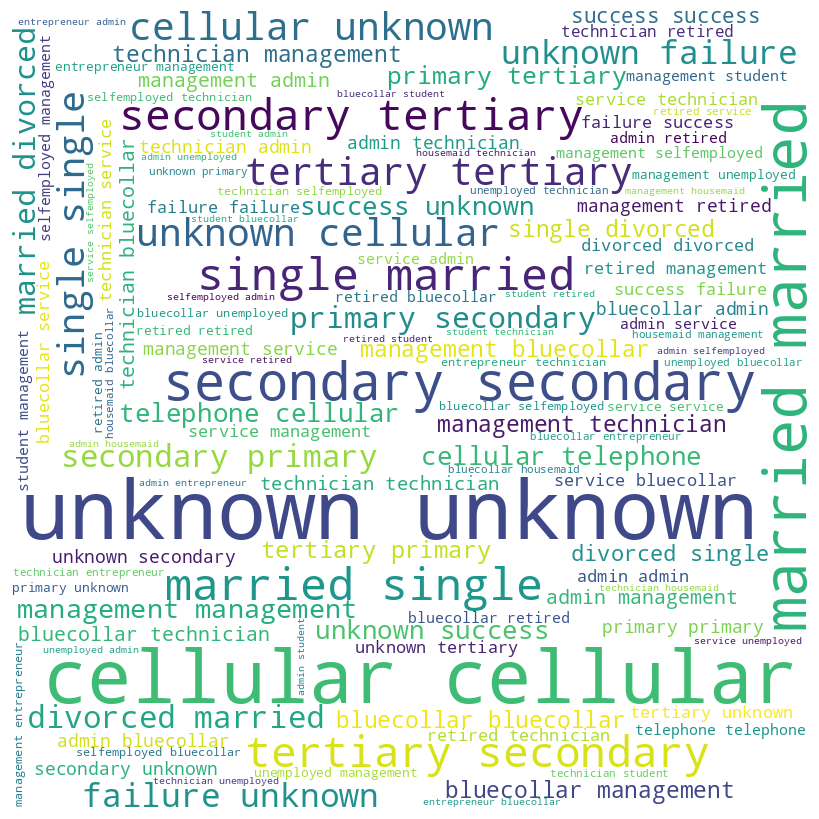

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all processed text into a single string
combined_text = " ".join(all_processed_text)

# Generate a Word Cloud image
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,  # Use default stopwords or define custom ones if needed
                      min_font_size = 10).generate(combined_text)

# Display the generated image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Generate insights

### Subtask:
Interpret the results of the analysis and visualizations to derive meaningful insights from the text data.


## Summary:

### Data Analysis Key Findings

*   The dataset contains various columns related to bank customer information, including 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', and 'poutcome'.
*   Preprocessing of text data from the 'job', 'education', 'marital', 'poutcome', and 'contact' columns involved converting text to lowercase, removing punctuation, removing stop words, and applying lemmatization.
*   The preprocessed text from the selected columns was successfully combined into a single list for further analysis.
*   Attempting to perform window-based co-occurrence network analysis was not successful due to the structure of the data, which consisted of concatenated individual categorical values rather than continuous text.
*   A Word Cloud visualization was successfully generated, showing the frequency of words from the combined preprocessed text, with more frequent words appearing larger.

### Insights or Next Steps

*   The Word Cloud provides a high-level overview of the most frequent terms across the selected categorical columns, indicating common attributes of the bank customers.
*   Since standard window-based co-occurrence analysis was not suitable for this data structure, consider alternative text analysis techniques for categorical data, such as analyzing the distribution of terms within each category or exploring associations between different categorical columns.
